In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from transformer_pipeline import drop_rows, get_features_transformer
from sklearn.cluster import AgglomerativeClustering, DBSCAN, HDBSCAN #it is avaliable since 1.3 version
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from metrics import *
from custom_preprocessors import IdentityTransformer
import sklearn
from sklearn.model_selection import train_test_split
from dimensionality_reduction_and_explanation_tools import *
# import warnings
# warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("data/movie_statistic_dataset.csv")
df, val = train_test_split(data, test_size=0.2, random_state=14)
df = drop_rows(df)

In [5]:
dim_red_funs = [get_nmf_plots,get_pca_plots,get_tsne_plots]

# Hierarchcal clustering

In [18]:
AG_transformer = make_pipeline(get_features_transformer(PowerTransformer(method="box-cox"),
                                          PowerTransformer(method="box-cox"),
                                          StandardScaler(),
                                          StandardScaler()), MinMaxScaler())
AG_X = AG_transformer.fit_transform(df)

In [19]:
model = AgglomerativeClustering()

parameters = {
    "n_clusters": [None],
    "linkage": ['ward', 'complete', 'average', 'single'],
    "distance_threshold": uniform(14,40)}

score = {
    "silhouette_score": silhouette,
    "calinski_harabasz_score": calinski_harabasz,
    "davies_bouldin_score": davies_bouldin}

In [20]:
tester = RandomizedSearchCV(estimator=model,
                            param_distributions= parameters,
                            random_state=14, 
                            scoring=score,
                            refit='silhouette_score',
                            n_iter=100,
                            cv=2) 

In [21]:
random_result = tester.fit(AG_X)
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))


c:\Users\szlin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\szlin\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\szlin\Desktop\Programowanie\WUM\PROJEKT 2\metrics.py", line 36, in silhouette
    return silhouette_score(X, labels)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\szlin\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\szlin\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 231, in silhouette_sam

Best: 0.169987 using {'distance_threshold': 14.321877941192717, 'linkage': 'ward', 'n_clusters': None}


In [22]:
model = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=30)
y = model.fit_predict(AG_X)
model.n_clusters_

2

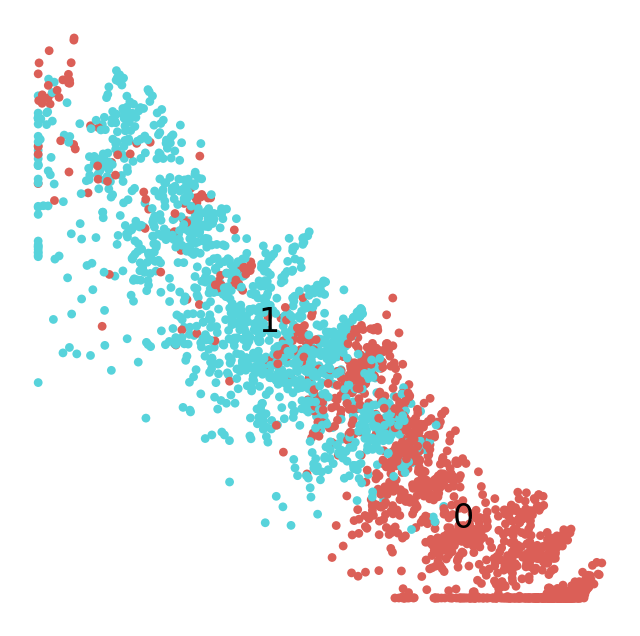

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [19] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


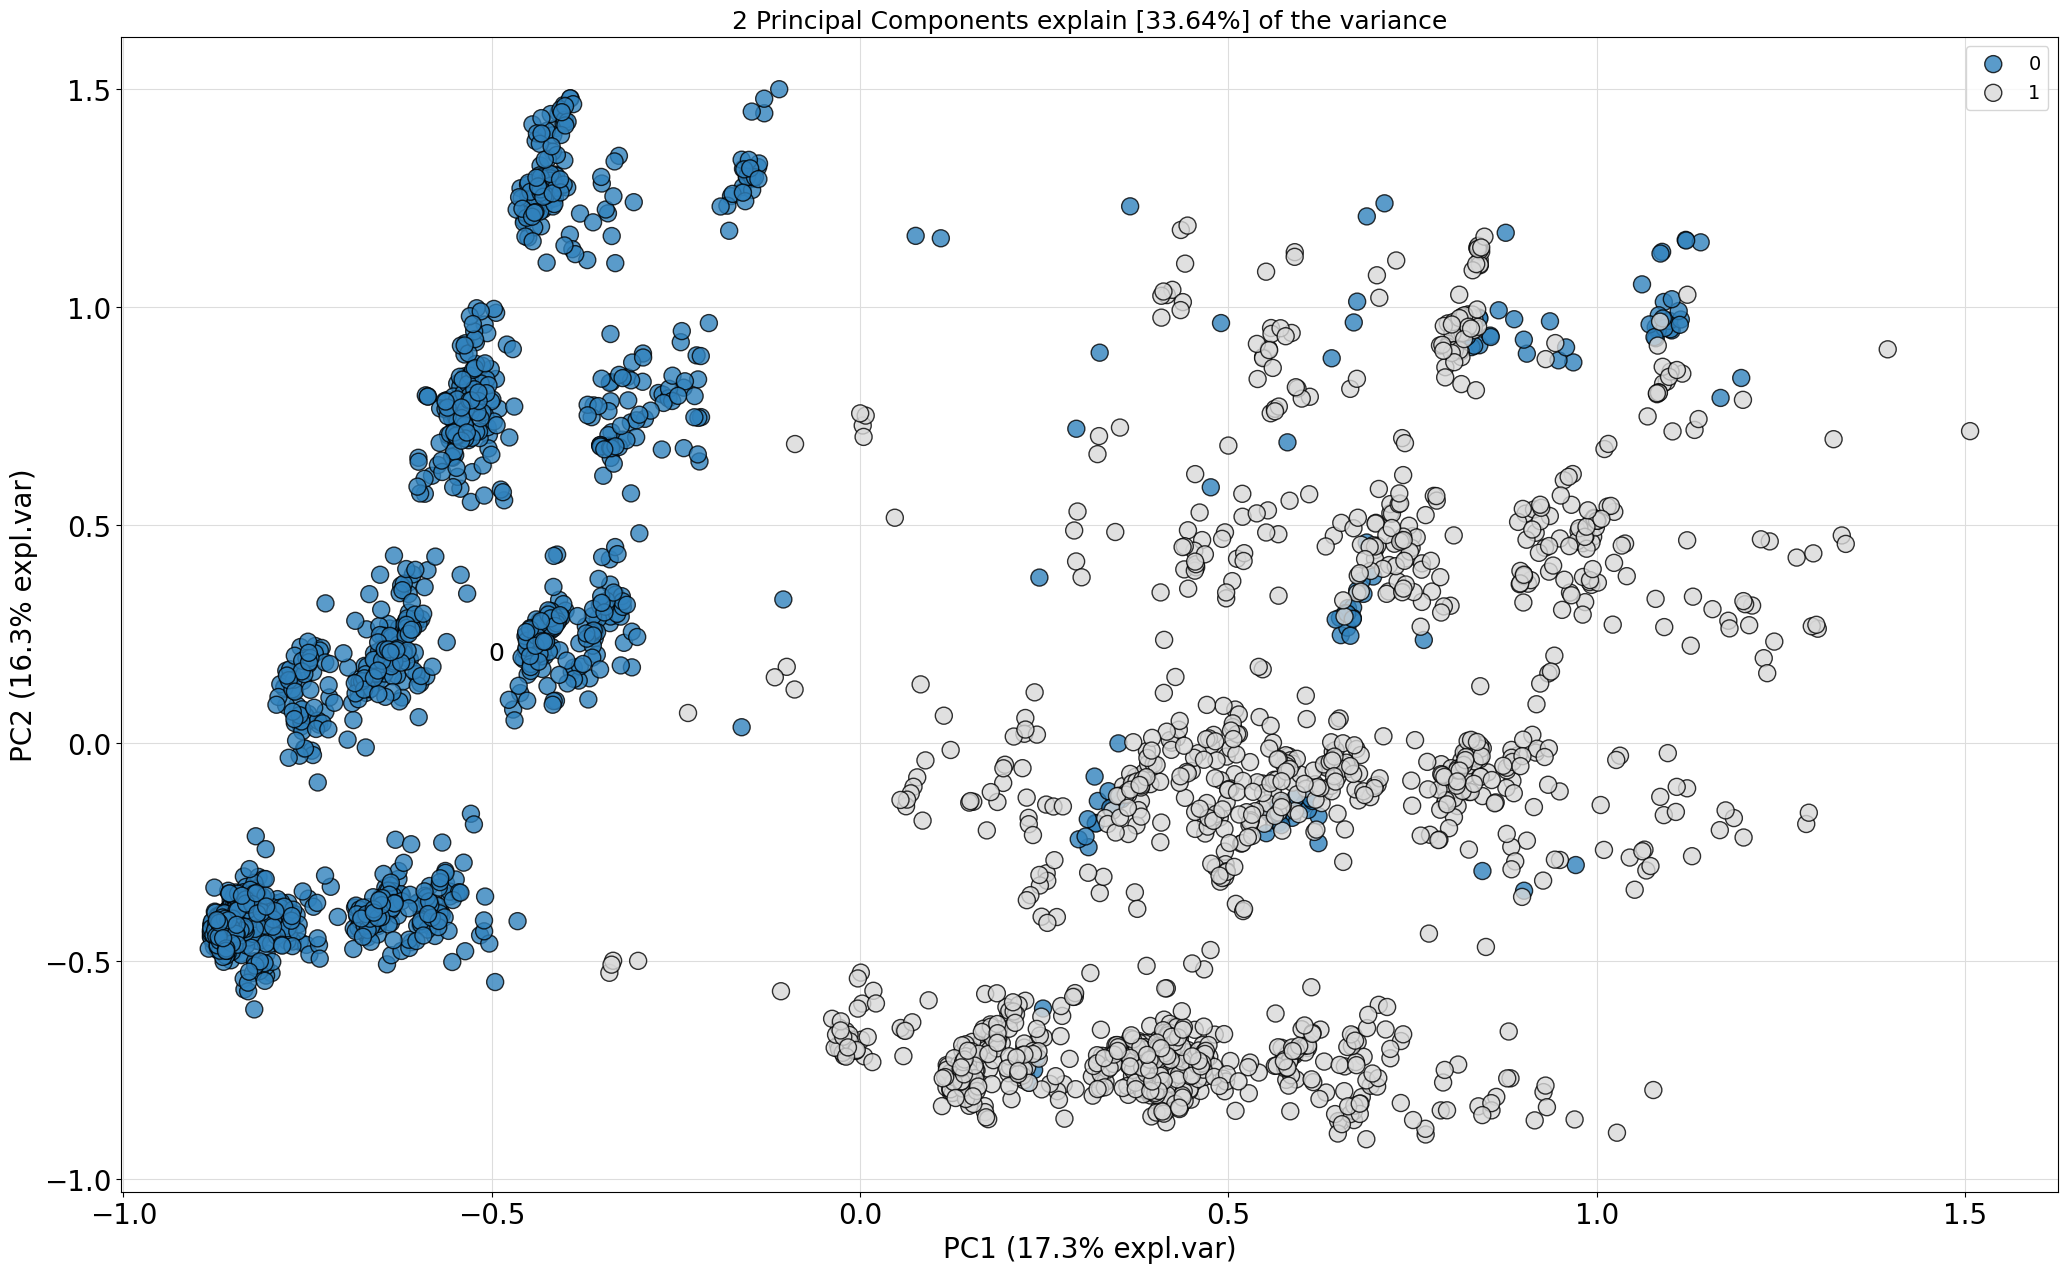

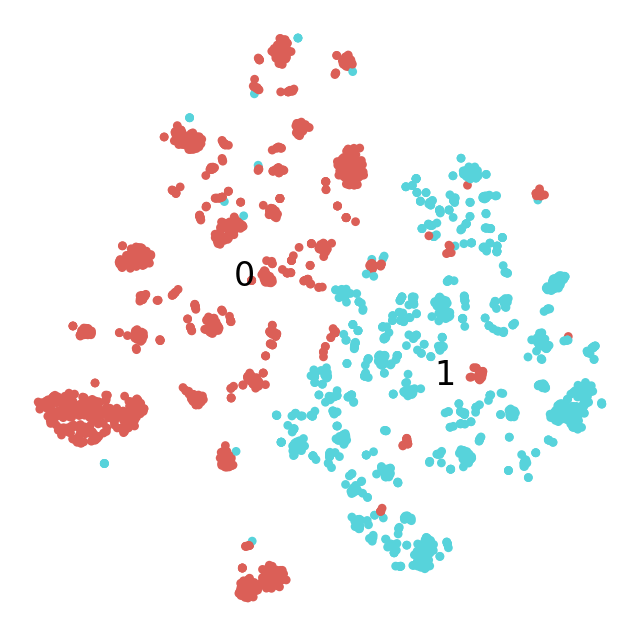

In [23]:
for fun in dim_red_funs:
    fun(AG_X,y)

# DBSCAN

In [24]:
DB_transformer = make_pipeline(get_features_transformer(PowerTransformer(method="box-cox"),
                                          PowerTransformer(method="box-cox"),
                                          IdentityTransformer(),
                                          IdentityTransformer()), MinMaxScaler())
DB_X = DB_transformer.fit_transform(df)
DB_X.shape

(2783, 19)

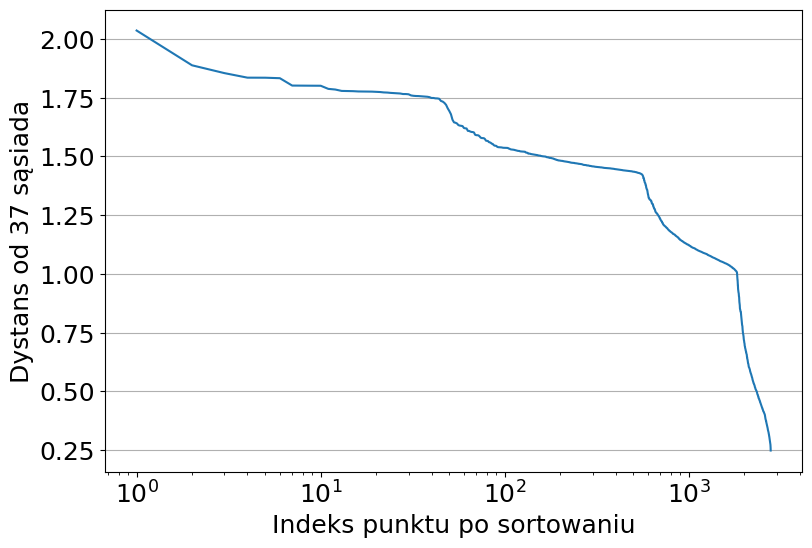

In [25]:
minPts = 38
nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(DB_X)
distances, indices = nbrs.kneighbors(DB_X)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks punktu po sortowaniu')
plt.ylabel('Dystans od 37 sąsiada')
ax1.plot(list(range(1,DB_X.shape[0]+1)), distanceDec)
plt.xscale('log')
plt.grid(axis='y')

plt.show()


In [26]:
#SOMETHING IS WRONG BUT IT IS THE END FOR TODAY
model = DBSCAN()
parameters = {
    "eps": uniform(0.75,2.0), #it suppose to be points with great loss on the plot but they give nan :)
    "min_samples": [minPts],
    "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}

score = {
    "silhouette_score": silhouette,
    "calinski_harabasz_score": calinski_harabasz,
    "davies_bouldin_score": davies_bouldin}

In [27]:
tester = RandomizedSearchCV(estimator=model,
                            param_distributions= parameters,
                            random_state=14, 
                            scoring=score,
                            refit='silhouette_score',
                            n_iter=100,
                            cv=2
                            ) 

In [28]:
random_result = tester.fit(DB_X)
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

c:\Users\szlin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\szlin\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\szlin\Desktop\Programowanie\WUM\PROJEKT 2\metrics.py", line 36, in silhouette
    return silhouette_score(X, labels)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\szlin\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\szlin\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 231, in silhouette_sam

Best: 0.185609 using {'algorithm': 'brute', 'eps': 1.6542745975167836, 'min_samples': 38}


c:\Users\szlin\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [        nan         nan  0.02837745         nan  0.1207268          nan
         nan  0.13280008         nan         nan  0.11975179  0.16018865
  0.10465016         nan  0.07756385  0.18511362         nan         nan
  0.11642342  0.1207268          nan         nan         nan         nan
         nan  0.18560872         nan         nan  0.15261591  0.1207268
         nan  0.18560872  0.1207268   0.06832421  0.18560872  0.0958013
         nan -0.05473265 -0.05473265         nan  0.1207268   0.03084261
         nan  0.03605627 -0.05473265         nan  0.11975179  0.06740693
         nan         nan         nan  0.18560872  0.16964718  0.10768016
         nan -0.05473265  0.11818431 -0.05473265         nan         nan
         nan         nan         nan         nan  0.18560872         nan
         nan  0.17200014  0.11980975  0.11979952 -0.0553

In [29]:
model = DBSCAN(min_samples= 38, eps=1.005, algorithm= 'auto')
y = model.fit_predict(DB_X)
labels = model.labels_
# Number of clusters without a noise labeled as -1
len(set(labels)) - (1 if -1 in labels else 0)

8

how TF eps is higher than top value in uniform?


c:\Users\szlin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\szlin\anaconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
[scatterd] >WARNING> posx and posy should be finite values
[scatterd] >WARNING> posx and posy should be finite values


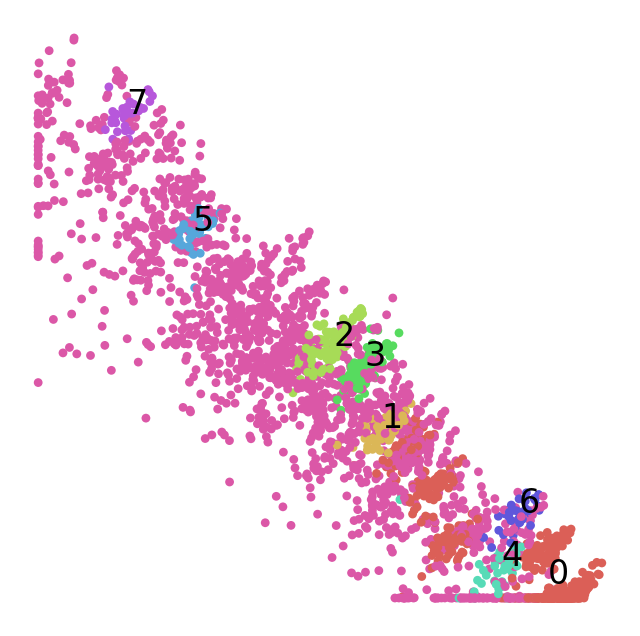

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [19] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


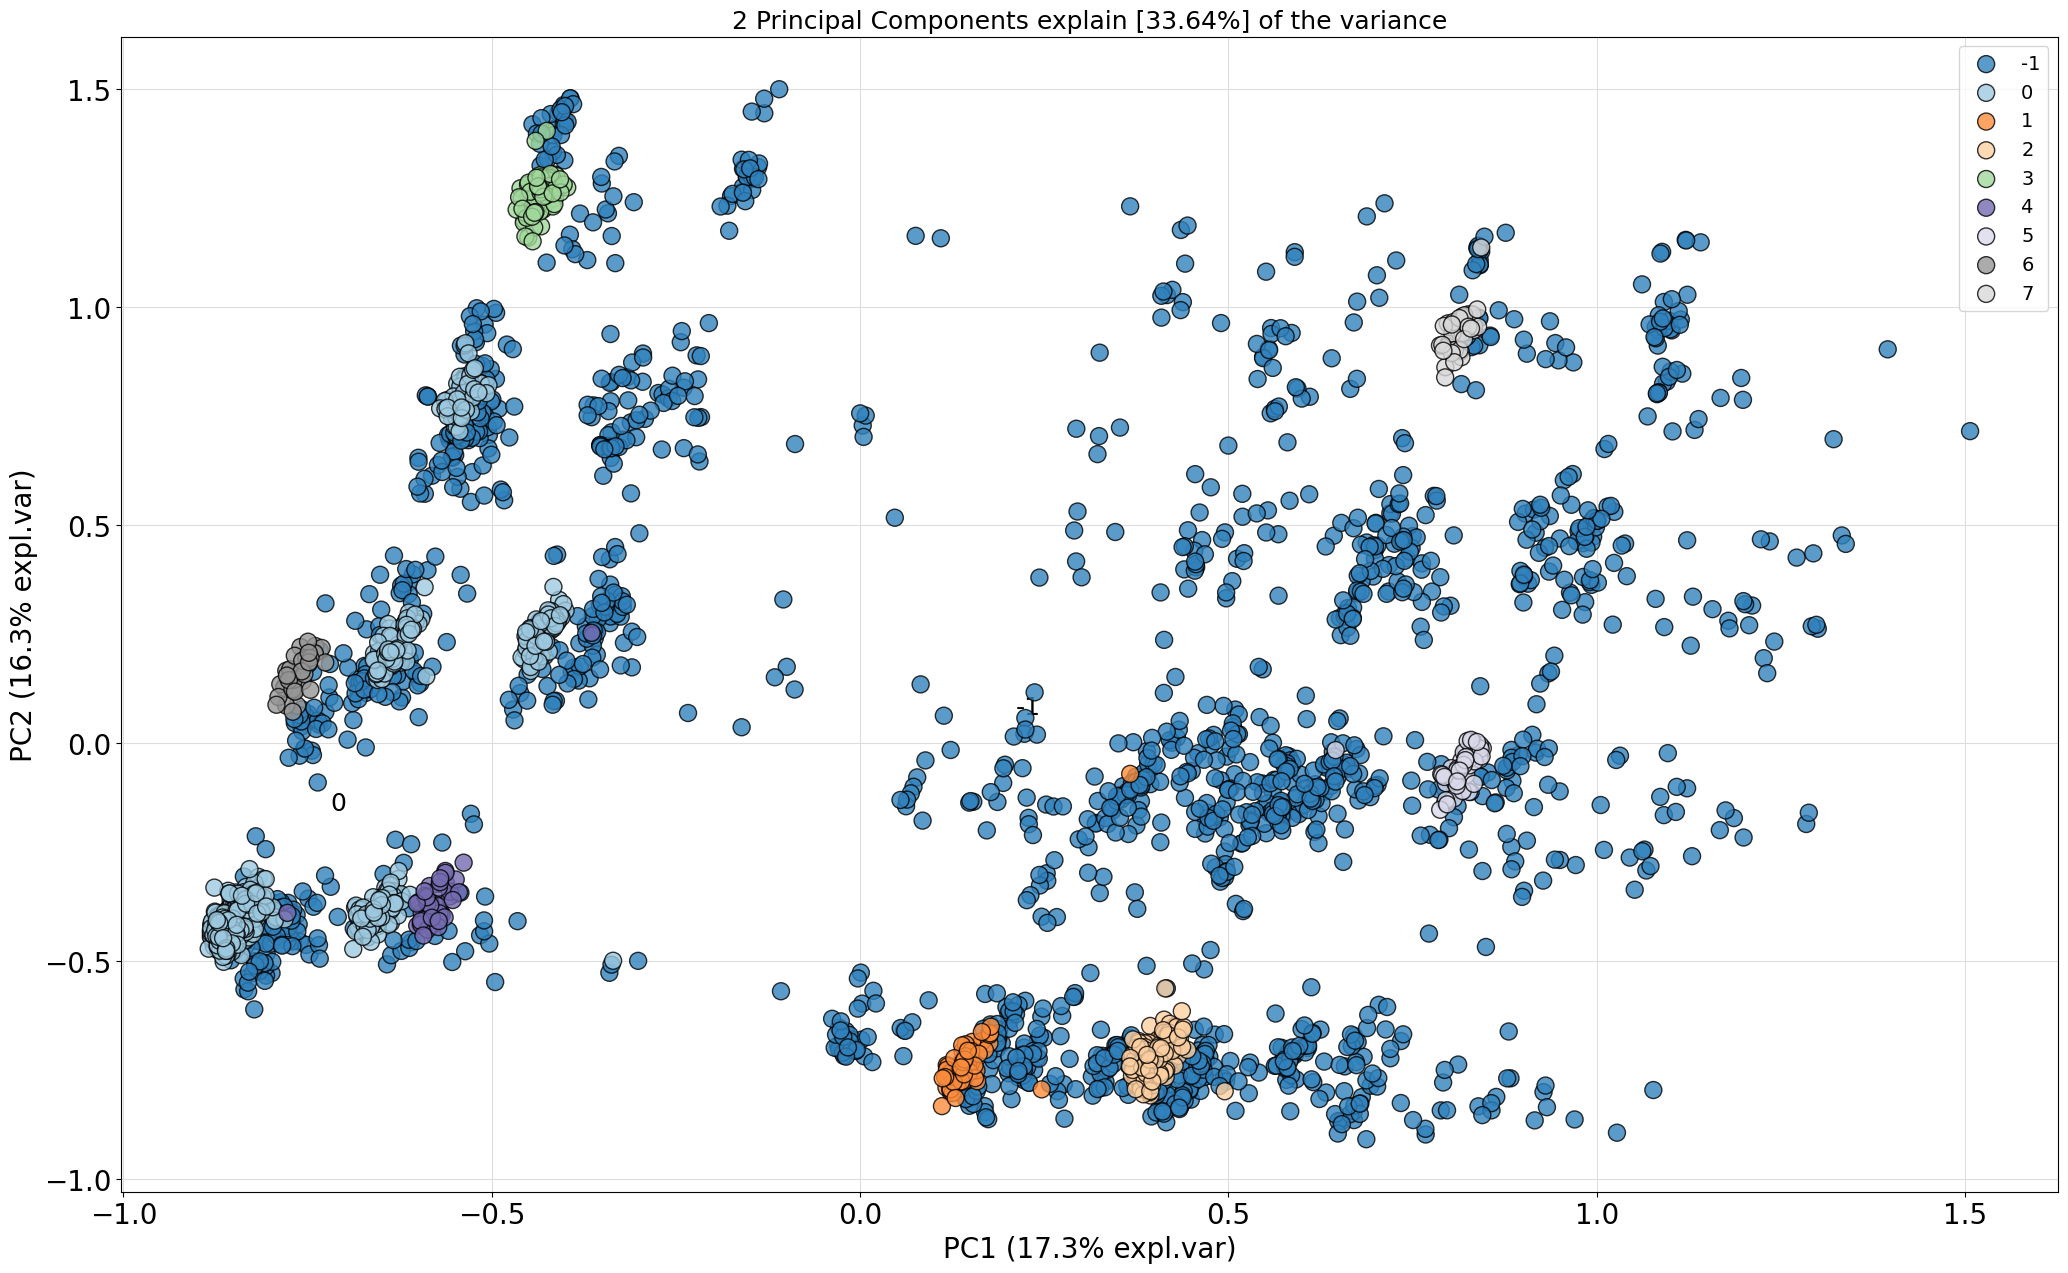

c:\Users\szlin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\szlin\anaconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
[scatterd] >WARNING> posx and posy should be finite values
[scatterd] >WARNING> posx and posy should be finite values


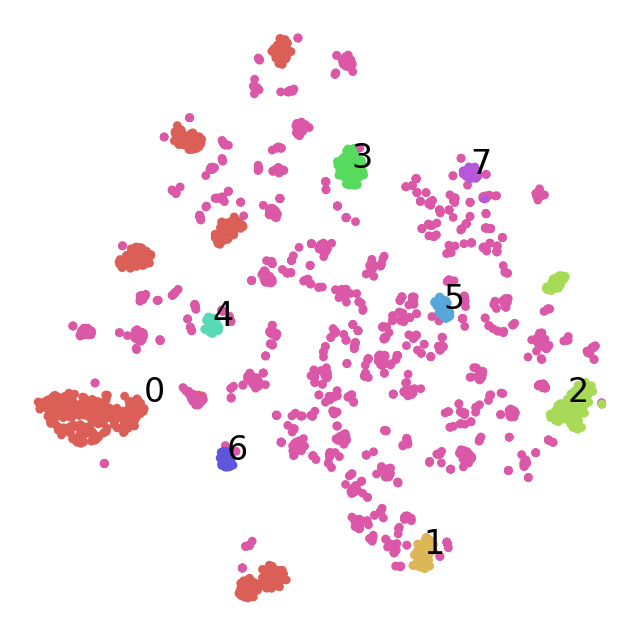

In [30]:
for fun in dim_red_funs:
    fun(DB_X,y)

# HDBSCAN

I JUST PREPARED THE TEMPLATE

In [27]:
HDB_transformer = make_pipeline(get_features_transformer(
    PowerTransformer(method="box-cox"),
    PowerTransformer(method="box-cox"),
    IdentityTransformer(),
    IdentityTransformer()
), MinMaxScaler())
HDB_X = HDB_transformer.fit_transform(df)

In [54]:
model = HDBSCAN()



parameters = {
    # "min_cluster_size": randint(50,1000),
    # "cluster_selection_epsilon": uniform(0,5),
    "algorithm":['auto', 'balltree', 'kdtree', 'brute']}

score = {
    "silhouette_score": silhouette,
    "calinski_harabasz_score": calinski_harabasz,
    "davies_bouldin_score": davies_bouldin}

In [55]:
tester = RandomizedSearchCV(estimator=model,
                            param_distributions= parameters,
                            random_state=14, 
                            scoring=score,
                            refit='silhouette_score',
                            n_iter=100,
                            # cv=2
                            ) 

In [56]:
random_result = tester.fit(HDB_X)
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

c:\Users\szlin\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\szlin\anaconda3\Lib\site-packages\sklearn\cluster\_hdbscan\hdbscan.py:798: FutureWarning: `algorithm='balltree'`has been deprecated in 1.4 and will be renamed to'ball_tree'`in 1.6. To keep the past behaviour, set `algorithm='ball_tree'`.
  warn(
c:\Users\szlin\anaconda3\Lib\site-packages\sklearn\cluster\_hdbscan\hdbscan.py:798: FutureWarning: `algorithm='balltree'`has been deprecated in 1.4 and will be renamed to'ball_tree'`in 1.6. To keep the past behaviour, set `algorithm='ball_tree'`.
  warn(
c:\Users\szlin\anaconda3\Lib\site-packages\sklearn\cluster\_hdbscan\hdbscan.py:798: FutureWarning: `algorithm='balltree'`has been deprecated in 1.4 and will be renamed to'ball_tree'`in 1.6. To keep the past behaviour, set `algorithm='ball_tree'`.
  war

Best: 0.103527 using {'algorithm': 'auto'}


In [62]:
model = HDBSCAN(min_cluster_size= 25)
y = model.fit_predict(HDB_X)
labels = model.labels_
len(set(labels)) - (1 if -1 in labels else 0)

22

c:\Users\szlin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\szlin\anaconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
[scatterd] >WARNING> posx and posy should be finite values
[scatterd] >WARNING> posx and posy should be finite values


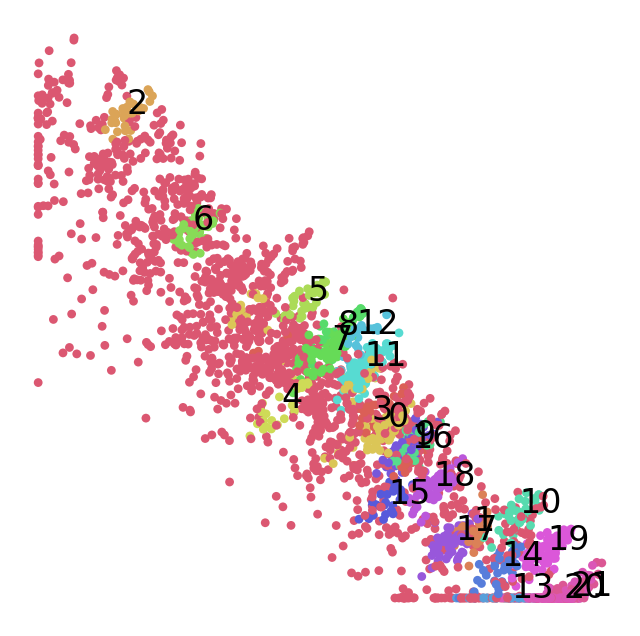

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [19] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


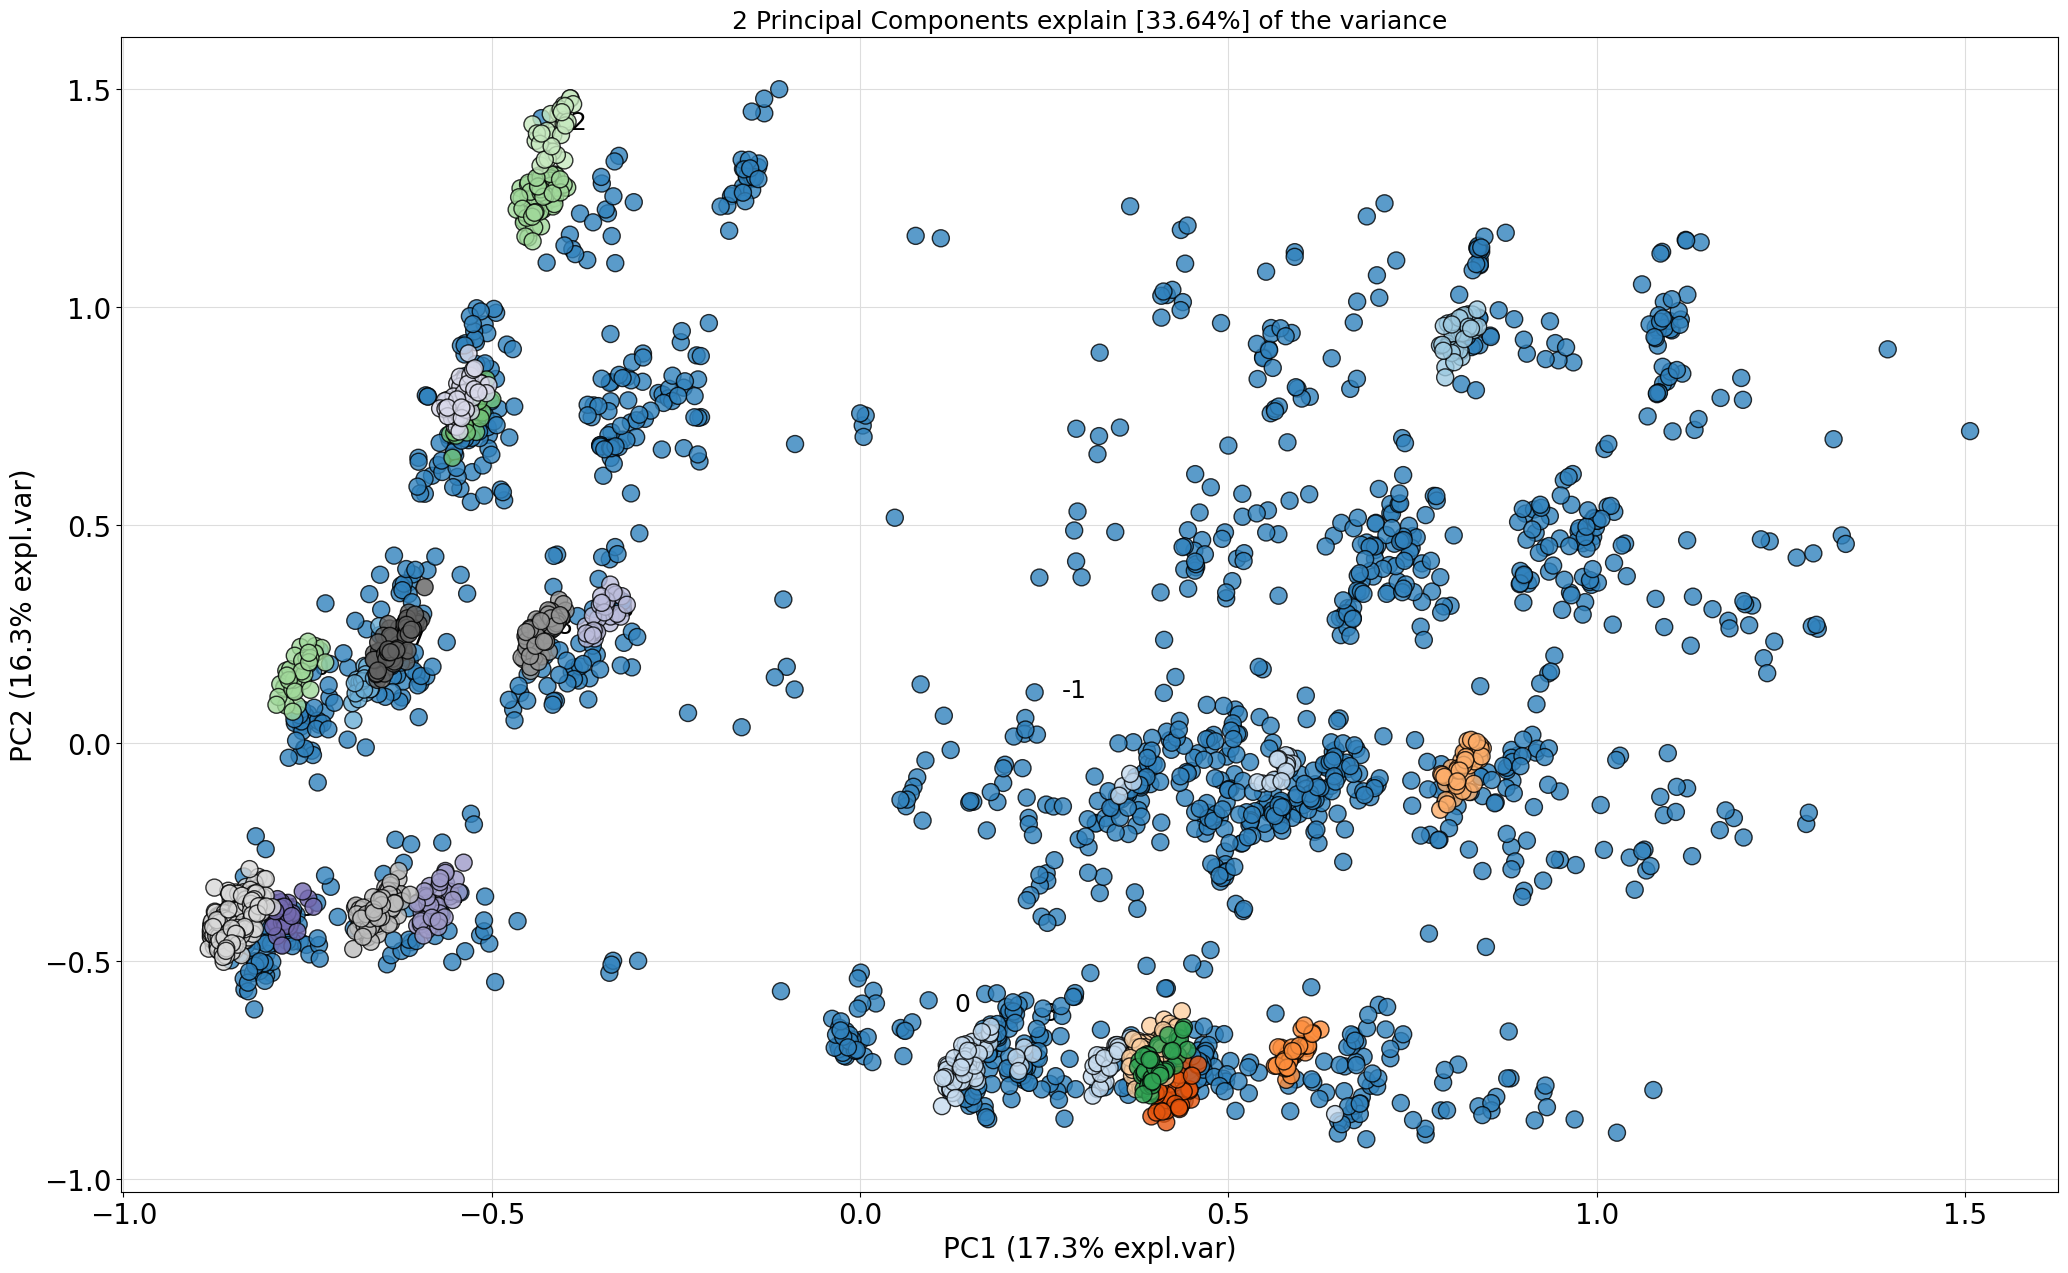

c:\Users\szlin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\szlin\anaconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
[scatterd] >WARNING> posx and posy should be finite values
[scatterd] >WARNING> posx and posy should be finite values


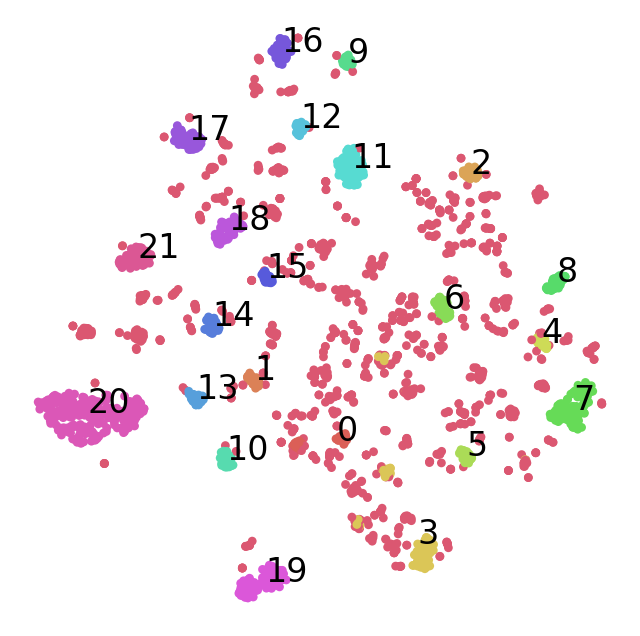

In [63]:
for fun in dim_red_funs:
    fun(HDB_X,y)